Unlike my colleague, Mikhail Sapozhnikov, I investigated the behavior of a sequential neural network model when solving the regression problem.

# Exploring and Processing the Data

In [0]:
import pandas as pd

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [0]:
df = pd.read_csv('insurance.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The following is a conversion of the source dataset. I convert 3 columns (sex, smoking, region). Since these columns have a finite range of values, I represent them as numbers.
I explored 2 options: using a label_encoder and onehot_encoder.

In [25]:
col = df.columns[df.dtypes == 'object']
label_encoder = LabelEncoder()
for column in col:
    df[column] = label_encoder.fit_transform(df[column])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [0]:
dataset = df.values
dataset

array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, ...,
        1.00000000e+00, 3.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, ...,
        0.00000000e+00, 3.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

Select input and output data

In [0]:
X = dataset[:,0:6]
Y = dataset[:,6]

In [0]:
from sklearn import preprocessing

Scale data

In [0]:
X_scale = preprocessing.scale(X)
Y_scale = preprocessing.scale(Y)

In [0]:
X_scale[0]

array([19. ,  0. , 27.9,  0. ,  1. ,  3. ])

In [0]:
Y_scale[0]

0.29858380247926036

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(936, 6) (201, 6) (201, 6) (936,) (201,) (201,)


In [0]:
Y_val

array([-9.33527925e-01,  2.89611015e-01, -1.66618791e-01, -6.90212943e-01,
       -1.43368863e-01, -5.62931566e-01,  1.24487095e+00,  7.61905648e-01,
       -7.46396801e-01, -3.91207000e-01, -7.45681171e-01, -5.30453450e-01,
        2.91272071e-01,  8.83645786e-01, -5.84170769e-01,  2.59145133e+00,
       -2.22488836e-01, -3.00692229e-01, -9.04366945e-01, -3.83009976e-03,
       -4.57905576e-01, -8.56713542e-01, -3.66375847e-01,  5.17849615e-01,
       -8.26916335e-01,  2.93701804e+00, -7.62671026e-02, -4.73608317e-01,
       -8.24245574e-01, -6.48086296e-01,  2.44405043e+00, -9.54118616e-01,
       -1.53545047e-01,  5.02247258e-01,  5.69734610e-01, -2.40439987e-02,
       -7.75939009e-01, -6.82877991e-01,  7.01498318e-02, -8.72429179e-01,
       -8.93224872e-01, -1.09478436e-01, -5.70768431e-01, -8.60352537e-01,
       -8.19226845e-01, -5.54736298e-01, -9.14187770e-01, -2.35224414e-01,
       -3.78470043e-01, -4.66187788e-01, -5.01719285e-01,  1.73339863e+00,
       -3.58377898e-01, -

# Building and Training Neural Network



In [0]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python import keras as keras

Sequential model

In [0]:
model = Sequential([
    Dense(85, input_shape=(6,)),
    Dense(60, activation='relu'),
    Dense(85, input_shape=(6,)),
    Dense(60, activation='relu'),
    Dense(1),
])

In [0]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['mse'])

In [0]:
hist = model.fit(X_train, Y_train,
          batch_size=80, epochs=20,
          validation_data=(X_val, Y_val))

Train on 936 samples, validate on 201 samples
Epoch 1/20
936/936 [==============================] - 0s 176us/step - loss: 0.1035 - mse: 0.6779 - val_loss: 0.0422 - val_mse: 0.3715
Epoch 2/20
936/936 [==============================] - 0s 29us/step - loss: 0.0425 - mse: 0.2947 - val_loss: 0.0351 - val_mse: 0.3043
Epoch 3/20
936/936 [==============================] - 0s 29us/step - loss: 0.0357 - mse: 0.2608 - val_loss: 0.0333 - val_mse: 0.3191
Epoch 4/20
936/936 [==============================] - 0s 28us/step - loss: 0.0344 - mse: 0.2642 - val_loss: 0.0326 - val_mse: 0.2962
Epoch 5/20
936/936 [==============================] - 0s 29us/step - loss: 0.0330 - mse: 0.2557 - val_loss: 0.0326 - val_mse: 0.2903
Epoch 6/20
936/936 [==============================] - 0s 28us/step - loss: 0.0323 - mse: 0.2407 - val_loss: 0.0328 - val_mse: 0.2845
Epoch 7/20
936/936 [==============================] - 0s 27us/step - loss: 0.0322 - mse: 0.2289 - val_loss: 0.0325 - val_mse: 0.2629
Epoch 8/20
936/936 [==

In [0]:
model.evaluate(X_test, Y_test)[1]

201/201 [==============================] - 0s 74us/step


0.17547932267189026

In [0]:
X_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
r2_score(X_pred, Y_test)

0.8398996669784423

It is also envisaged to preserve the model and evaluate its performance

In [0]:
#model.save('model().h5')

In [0]:
#uploaded = files.upload()

Saving model(83.4).h5 to model(83.4).h5


In [0]:
#model1 = keras.models.load_model('model(83.4).h5')

In [0]:
#model1.evaluate(X_test, Y_test)[1]

# Visualizing Loss and MSE

In [0]:
import matplotlib.pyplot as plt

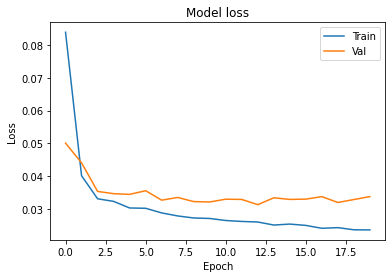

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

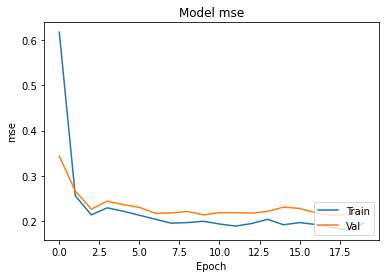

In [0]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()